Saving iris (2).csv to iris (2).csv
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Accuracy with default n_estimators=10: 1.0000
Best accuracy: 1.0000 with n_estimators=10


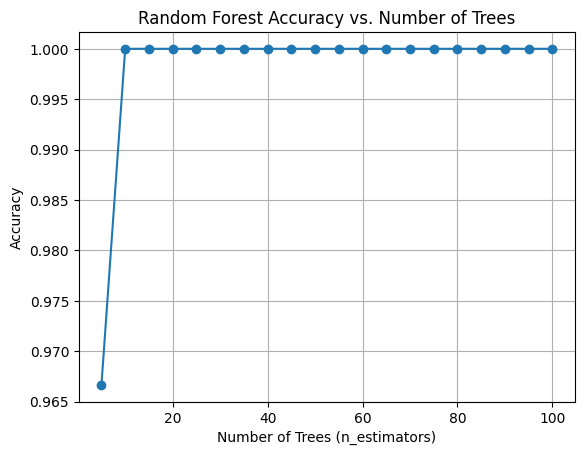

In [1]:
#iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from google.colab import files

# Upload the CSV file
uploaded = files.upload()
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(next(iter(uploaded)))  # Load the first uploaded file
print(df.head())

# Split data into features and target
X = df.drop("species", axis=1)
y = df["species"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train model with default n_estimators = 10
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
default_score = accuracy_score(y_test, y_pred_default)
print(f"Accuracy with default n_estimators=10: {default_score:.4f}")

# 2. Fine-tuning: test different values for n_estimators
scores = {}
for n in range(5, 105, 5):  # from 5 to 100 in steps of 5
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[n] = acc

# Find best score and corresponding n_estimators
best_n = max(scores, key=scores.get)
best_score = scores[best_n]
print(f"Best accuracy: {best_score:.4f} with n_estimators={best_n}")

# Optional: plot accuracy vs. number of trees
plt.plot(list(scores.keys()), list(scores.values()), marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs. Number of Trees")
plt.grid(True)
plt.show()
